In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 12,
  'grid.alpha': 0.25})

## Function declarations

### Read `ods` to `DataFrame`


In [8]:
def read_ods(filename, columns=None):
  if columns is None:
    df = pd.read_excel(filename, engine="odf", header=0)
  else:
    key_arr = (k for k in columns.keys())
    df = pd.read_excel(filename, engine="odf", header=0,
                      usecols=columns)
    df = df.rename(columns=columns)
  return df

## Load the data

In [9]:
filename = "05-table-01-milk-gallons.ods"

df = read_ods(filename)

df


,Week,"Weekly Sales Level, Y (1,000s of gallons)",Selling Price X ($)
0,1,10,1.3
1,2,6,2.0
2,3,5,1.7
3,4,12,1.5
4,5,10,1.6
5,6,15,1.2
6,7,5,1.6
7,8,12,1.4
8,9,17,1.0
9,10,20,1.1


## Compute correlation between $X$ (independent variable) and $Y$ (dependent variable)

$r$ is a sample correlation coefficient

$$
  r = \frac{
      n \sum XY - (\sum X)(\sum Y)
    }{
      \sqrt{n \sum X^2 - (\sum X)^2} \sqrt{n \sum Y^2 - (\sum Y)^2}
    }
$$

where $\sum XY := \sum^n_{i=1} x_i y_i$, $\quad$ $\sum X = \sum^n_{i=1} x_i$ $\quad$ and
$\sum X^2 = \sum^n_{i=1} x^2_i$

In [17]:
df_corr = df.copy()

# rename the corresponding X and Y column
df_corr = df_corr.rename(columns={
  "Weekly Sales Level, Y (1,000s of gallons)": 'Y',
  "Selling Price X ($)": 'X'})

df_corr["XY"] = df_corr['X'] * df_corr['Y']
df_corr["X^2"] = df_corr['X']**2
df_corr["Y^2"] = df_corr['Y']**2

n = len(df_corr)
sumXY = df_corr["XY"].sum()
sumX = df_corr["X"].sum()
sumY = df_corr["Y"].sum()
sumXsq = df_corr["X^2"].sum()
sumYsq = df_corr["Y^2"].sum()
r = (n * sumXY - sumX*sumY) \
  / (np.sqrt(n*sumXsq - sumX**2) * np.sqrt(n*sumYsq - sumY**2))

print(f"r = {r:.2f}")
df_corr

r = -0.86


,Week,Y,X,XY,X^2,Y^2
0,1,10,1.3,13.0,1.69,100
1,2,6,2.0,12.0,4.00,36
2,3,5,1.7,8.5,2.89,25
3,4,12,1.5,18.0,2.25,144
4,5,10,1.6,16.0,2.56,100
5,6,15,1.2,18.0,1.44,225
6,7,5,1.6,8.0,2.56,25
7,8,12,1.4,16.8,1.96,144
8,9,17,1.0,17.0,1.00,289
9,10,20,1.1,22.0,1.21,400


## Scatter plot

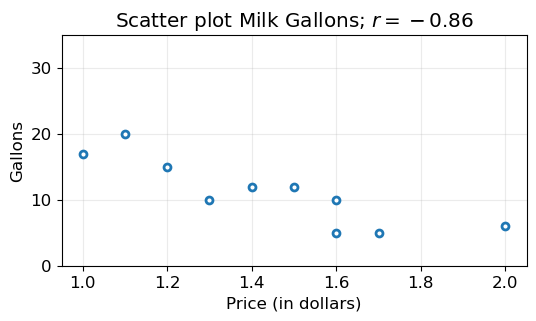

In [26]:
fig, ax = plt.subplots(figsize=(6, 3))


ax.plot(df_corr["X"], df_corr["Y"], 
  marker='o', markersize=5, markerfacecolor='white',
  linestyle='None', markeredgewidth=2) 

ax.set_ylim([0, 35])

ax.set_xlabel("Price (in dollars)")
ax.set_ylabel("Gallons")
ax.set_title(r"Scatter plot Milk Gallons; $r = {:.2f}$".format(r))
ax.grid("on")
plt.show(fig)


The question that may occur next is, how much does the volume drop as price is raised?